# Classificastion Task - predict Covid19 

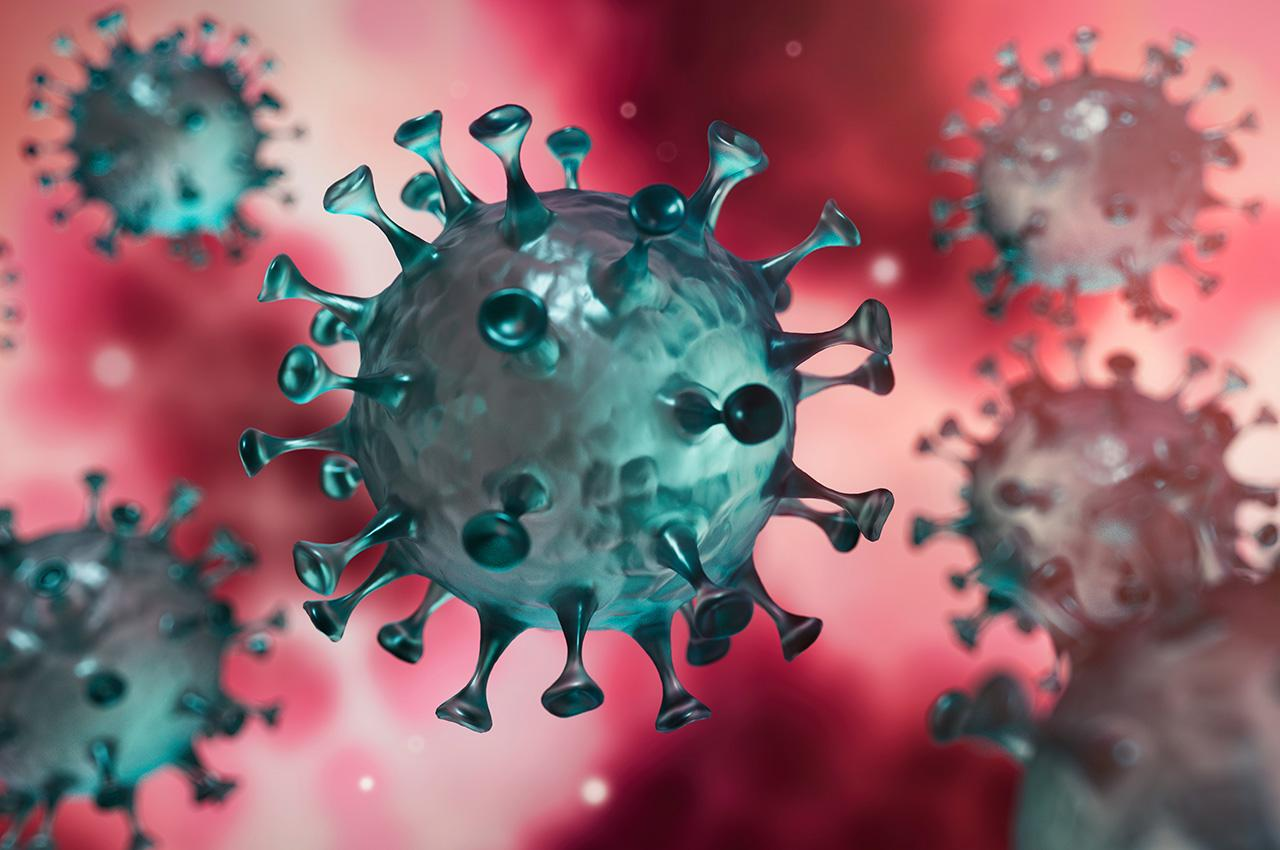

## General information about Covid19

Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2. The first known case was identified in Wuhan, China, in December 2019.The disease has since spread worldwide, leading to an ongoing pandemic.

Symptoms of COVID‑19 are variable, but often include **fever, cough, headache, fatigue, breathing difficulties, loss of smell, and loss of taste**. Symptoms may begin one to fourteen days after exposure to the virus. At least a third of people who are infected do not develop noticeable symptoms. Of those people who develop symptoms noticeable enough to be classed as patients, most (81%) develop mild to moderate symptoms (up to mild pneumonia), while 14% develop severe symptoms (dyspnea, hypoxia, or more than 50% lung involvement on imaging), and 5% suffer critical symptoms (respiratory failure, shock, or multiorgan dysfunction).] Older people are at a higher risk of developing severe symptoms. Some people continue to experience a range of effects (long COVID) for months after recovery, and damage to organs has been observed. Multi-year studies are underway to further investigate the long-term effects of the disease.

# Our classification prediction:if the person is positive with corona


# Importing necessary libraries

In [341]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold


from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
warnings.filterwarnings('ignore')

## Part #1 : Basic info on the Data

In [281]:
df = pd.read_csv("/Users/twmrgwzln/Downloads/corona_tested_individuals_ver_00225.csv")

In [282]:
#df = pd.read_csv("C:\\Project\\corona_tested_individuals_ver_00225.csv")


### This dataset contains information about Covid19 taken from https://data.gov.il/dataset/covid-19.

The columns in the given dataset is as follows:

- **test_date:** the date the test were taken
- **cough:**if the person is coughing or not
- **fever:**if the person is having fever or not
- **sore_thorat:**if the person is having sore thoat or not
- **shortness_of_breath:**if the person having shortness of breathing or not
- **head_ache:** if the person is having head ache or not
- **corona_result:** the result of the corona test, postive or negative
- **age_60_and_above:** if the person is abobe 60 or not
- **gender:** whats is the gender, male or female
- **test_indication:** where the test had been taking

In [283]:
df.sample (7)

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
9049405,2020-03-16,0,0,0,0,0,שלילי,NaN,NaN,Other
2596381,2021-08-05,0,0,0,0,0,שלילי,No,זכר,Other
7636648,2020-08-24,0,0,0,0,0,שלילי,No,נקבה,Other
4160802,2021-02-21,0,0,0,0,0,שלילי,No,נקבה,Other
5867116,2020-12-07,0,0,0,0,0,שלילי,No,זכר,Other
8594559,2020-06-04,0,0,0,0,0,שלילי,NaN,נקבה,Other
3013489,2021-07-08,0,0,0,0,0,שלילי,No,NaN,Other


- Just by looking at the data, we can see with have too much. <br>We will need to get rid of some of the data, we will do it later.

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9053448 entries, 0 to 9053447
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 690.7+ MB


- We will now change all the string data to int data in order to have the same type:
Female will be 0, male will be 1.
<br> Negative will be 0, positive will be 1.
<br> Under age 60 will be 0, Above will be 1
<br> And we will get rid of the "other" in corona result so it won't affect the data.

In [285]:
df.drop(df[df['corona_result'] == "אחר"].index, inplace = True)

In [286]:
df['gender'] = df['gender'].replace({"זכר": 1, "נקבה": 0})
df['corona_result'] = df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
df['age_60_and_above'] = df['age_60_and_above'].replace({"Yes": 1, "No": 0})


In [287]:
# checking all the data share the same type:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8858382 entries, 0 to 9053447
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   test_date            object 
 1   cough                int64  
 2   fever                int64  
 3   sore_throat          int64  
 4   shortness_of_breath  int64  
 5   head_ache            int64  
 6   corona_result        int64  
 7   age_60_and_above     float64
 8   gender               float64
 9   test_indication      object 
dtypes: float64(2), int64(6), object(2)
memory usage: 743.4+ MB


- We want want to predict the corona result column, so we first take a look at all the data about it

In [288]:
# Postive with corona:
df[df['corona_result']==1].describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,908643.000000,908643.000000,908643.000000,908643.000000,908643.000000,908643.0,873113.000000,854545.000000
mean,0.142531,0.121596,0.065954,0.017223,0.127806,1.0,0.127039,0.483181
std,0.349594,0.326818,0.248203,0.130103,0.333874,0.0,0.333016,0.499717
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


In [289]:
# negative with corona:
df[df['corona_result']==0].describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,7.949739e+06,7.949739e+06,7.949739e+06,7.949739e+06,7.949739e+06,7949739.0,6.109333e+06,6.485047e+06
mean,3.526871e-02,2.565342e-02,1.340597e-02,2.387500e-03,2.584274e-02,0.0,1.333741e-01,4.829492e-01
std,1.844582e-01,1.580991e-01,1.150055e-01,4.880369e-02,1.586660e-01,0.0,3.399787e-01,4.997092e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00


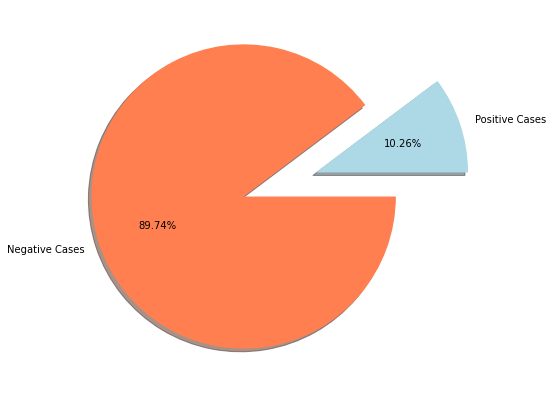

In [290]:
df_negative = df['corona_result'] == 0
df_positive = df['corona_result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [df_positive.sum(), df_negative.sum()]
colors = ['lightblue', 'coral']
explode = (0.5, 0) 

fig, axs = plt.subplots(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=0)


plt.show()

### important information from the tables above:
- The majority of the cases are the negative results.

### Now we will clean all the NaN Data

In [291]:
df.isnull().sum()
df = df.dropna()

### Checking the size after cleaning all the NaN data

In [292]:
df.shape

(6207383, 10)

### After we cleaned around 3 milions rows of the data, we can still see we have alot of data. we will take a sample from the data that feature distributions are preserved.

In [293]:
sample_df= df.sample(int(len(df) * 0.002))

## info about the sample data

### size of the sample data

In [294]:
sample_df.shape

(12414, 10)

In [295]:
sample_df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
8317177,2020-07-01,0,0,0,0,0,1,0.0,0.0,Other
5508889,2020-12-21,0,0,0,0,0,0,0.0,1.0,Other
756119,2022-01-10,0,0,0,0,0,0,1.0,0.0,Other
5820966,2020-12-09,0,0,0,0,0,0,0.0,1.0,Other
7557457,2020-08-31,0,0,0,0,0,0,0.0,1.0,Other


Corona result that equals to "other" is still irrelevant so we will drop it

In [296]:
sample_df.drop(sample_df[sample_df['corona_result'] == "אחר"].index, inplace = True)

### Changing all the types to int

In [297]:
sample_df['gender'] = sample_df['gender'].replace({"זכר": 1, "נקבה": 0})
sample_df['corona_result'] = sample_df['corona_result'].replace({"חיובי": 1, "שלילי": 0})
sample_df['age_60_and_above'] = sample_df['age_60_and_above'].replace({"Yes": 1, "No": 0})

In [298]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12414 entries, 8317177 to 2902241
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   test_date            12414 non-null  object 
 1   cough                12414 non-null  int64  
 2   fever                12414 non-null  int64  
 3   sore_throat          12414 non-null  int64  
 4   shortness_of_breath  12414 non-null  int64  
 5   head_ache            12414 non-null  int64  
 6   corona_result        12414 non-null  int64  
 7   age_60_and_above     12414 non-null  float64
 8   gender               12414 non-null  float64
 9   test_indication      12414 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.3+ MB


In [299]:
sample_df['gender'].value_counts()

0.0    6423
1.0    5991
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

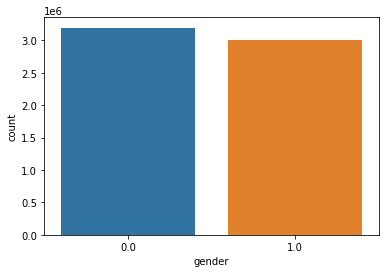

In [300]:
sns.countplot(df['gender'])


In [301]:
cough_sample = sample_df['cough'] == 1
fever_sample = sample_df['fever'] == 1
sore_throat_sample = sample_df['sore_throat']== 1
shortness_of_breath_sample = sample_df['shortness_of_breath']==1
head_ache_sample = sample_df['head_ache']==1
corona_result_sample = sample_df['corona_result']==1
age_60_and_above_sample = sample_df['age_60_and_above']==1

cough_sample = cough_sample.sum()
fever_sample =fever_sample.sum()
sore_throat_sample=sore_throat_sample.sum()
shortness_of_breath_sample=shortness_of_breath_sample.sum()
head_ache_sample=head_ache_sample.sum()
corona_result_sample=corona_result_sample.sum()
age_60_and_above_sample=age_60_and_above_sample.sum()

In [302]:
Distribution_sample={'colums':['cough','fever','sore_throat','shortness_of_breath','head_ache', 'corona_result','age_60_and_above'],
                     'count':[cough_sample,fever_sample,sore_throat_sample,shortness_of_breath_sample,head_ache_sample,corona_result_sample,age_60_and_above_sample]}

Distribution_sample=pd.DataFrame(data=Distribution_sample,index=range(7))
Distribution_sample

,colums,count
0,cough,646
1,fever,538
2,sore_throat,269
3,shortness_of_breath,49
4,head_ache,527
5,corona_result,1704
6,age_60_and_above,1534


In [303]:
cough = df['cough'] == 1
fever = df['fever'] == 1
sore_throat = df['sore_throat']== 1
shortness_of_breath = df['shortness_of_breath']==1
head_ache = df['head_ache']==1
corona_result = df['corona_result']==1
age_60_and_above = df['age_60_and_above']==1

cough = cough.sum()
fever =fever.sum()
sore_throat=sore_throat.sum()
shortness_of_breath=shortness_of_breath.sum()
head_ache=head_ache.sum()
corona_result=corona_result.sum()
age_60_and_above=age_60_and_above.sum()

In [304]:
Distribution_orginal={'colums':['cough','fever','sore_throat','shortness_of_breath','head_ache','corona_result','age_60_and_above'],
                      'count':[cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above]}

Distribution_orginal=pd.DataFrame(data=Distribution_orginal,index=range(7))
Distribution_orginal

,colums,count
0,cough,312000
1,fever,242341
2,sore_throat,132744
3,shortness_of_breath,26675
4,head_ache,258328
5,corona_result,826347
6,age_60_and_above,809527


## Now we will check the distribtuion of the parameters stays the same like the original data frame

Text(0.5, 1.0, 'Distribution_sample')

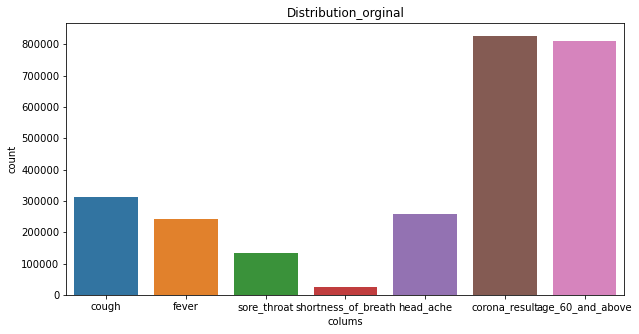

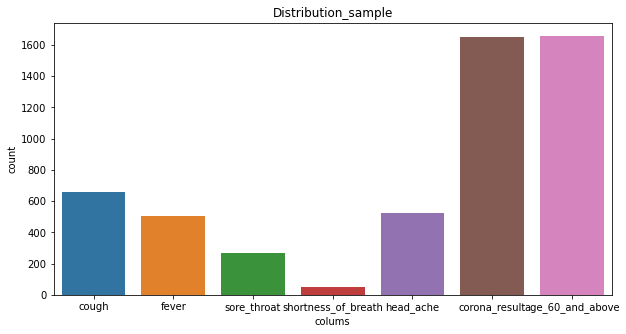

In [232]:
fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_orginal).set_title('Distribution_orginal')

fig = plt.figure(figsize=(10,5))
sns.barplot('colums','count',data=Distribution_sample).set_title('Distribution_sample')

### From the table above we can infer that the ration stays the same

In [233]:
sample_df[sample_df['corona_result']==1].describe()


,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.0,1650.000000,1650.000000
mean,0.149091,0.117576,0.069697,0.013939,0.123030,1.0,0.129091,0.463636
std,0.356286,0.322203,0.254713,0.117275,0.328572,0.0,0.335402,0.498827
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


## We can now see the percentage between postive and negative case stays roughly the same

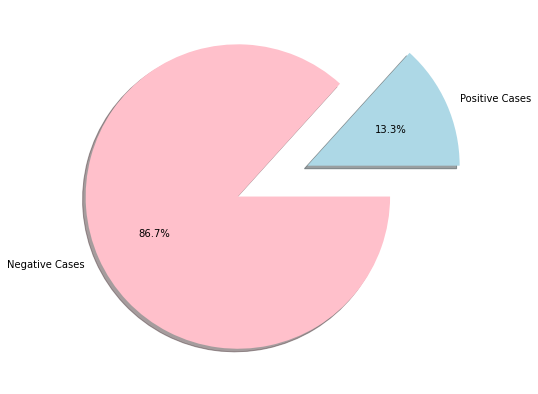

In [234]:
sample_df_negative = sample_df['corona_result'] == 0
sample_df_positive = sample_df['corona_result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [sample_df_positive.sum(), sample_df_negative.sum()]
colors = ['lightblue', 'pink']
explode = (0.5, 0) 

fig, axs = plt.subplots(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)


plt.show()

## Showing the connection between sympytonms and corona reslut

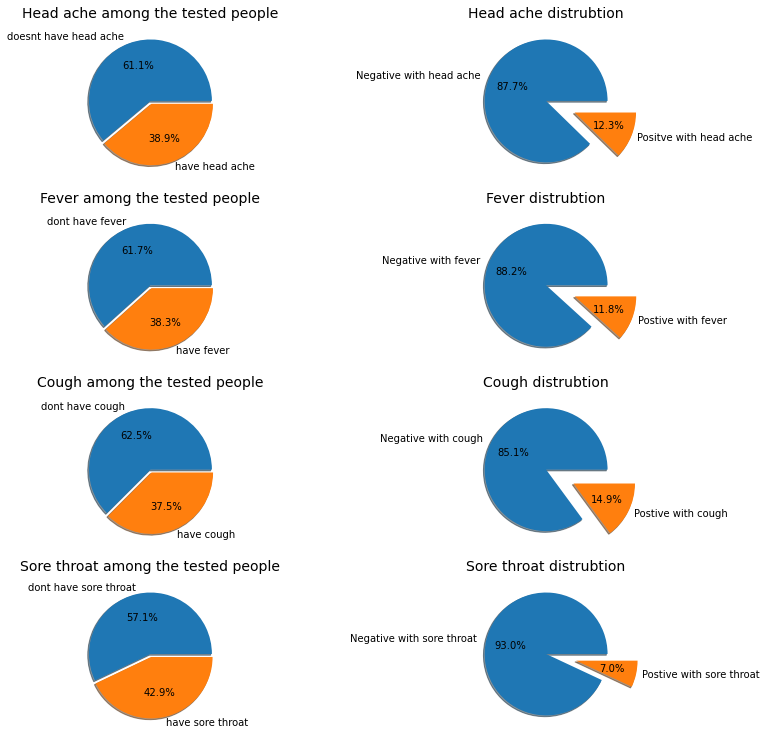

In [235]:
fig, ax = plt.subplots(4,2 ,figsize = (13,13))
((ax1, ax2) , (ax3, ax4),(ax5, ax6) , (ax7, ax8)) = ax
labels = ["doesnt have head ache ", "have head ache"]
values = sample_df[(sample_df['head_ache']==1)]['corona_result'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax1.set_title("Head ache among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with head ache ", "Positve with head ache"]
values = sample_df[(sample_df['corona_result']==1)]['head_ache'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax2.set_title("Head ache distrubtion", fontdict={'fontsize': 14})

labels = ["dont have fever", "have fever"]
values = sample_df[(sample_df['fever']==1)]['corona_result'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax3.set_title("Fever among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with fever ", "Postive with fever"]
values = sample_df[(sample_df['corona_result']==1)]['fever'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax4.set_title("Fever distrubtion", fontdict={'fontsize': 14})

labels = ["dont have cough", "have cough"]
values = sample_df[(sample_df['cough']==1)]['corona_result'].value_counts().tolist()
ax5.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax5.set_title("Cough among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with cough ", "Postive with cough"]
values = sample_df[(sample_df['corona_result']==1)]['cough'].value_counts().tolist()
ax6.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax6.set_title("Cough distrubtion", fontdict={'fontsize': 14})

labels = ["dont have sore throat", "have sore throat"]
values = sample_df[(sample_df['sore_throat']==1)]['corona_result'].value_counts().tolist()
ax7.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.05])
ax7.set_title("Sore throat among the tested people", fontdict={'fontsize': 14})

labels = ["Negative with sore throat ", "Postive with sore throat"]
values = sample_df[(sample_df['corona_result']==1)]['sore_throat'].value_counts().tolist()
ax8.pie(x=values, labels=labels, autopct="%1.1f%%", shadow=True , explode=[0, 0.5])
ax8.set_title("Sore throat distrubtion", fontdict={'fontsize': 14})


plt.show()

# Checking for correlations in our dataset

We want to see more cleary if there is a correlation between all the parameters

In [236]:
sample_df.corr()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
cough,1.000000,0.324605,0.286985,0.124056,0.323672,0.168437,0.083045,-0.017340
fever,0.324605,1.000000,0.210443,0.150631,0.281581,0.152097,0.022113,0.000724
sore_throat,0.286985,0.210443,1.000000,0.144840,0.308559,0.129600,0.018299,-0.023678
shortness_of_breath,0.124056,0.150631,0.144840,1.000000,0.116915,0.059109,0.018554,0.011748
head_ache,0.323672,0.281581,0.308559,0.116915,1.000000,0.157975,-0.001978,-0.038460
corona_result,0.168437,0.152097,0.129600,0.059109,0.157975,1.000000,-0.005051,-0.017821
age_60_and_above,0.083045,0.022113,0.018299,0.018554,-0.001978,-0.005051,1.000000,-0.023194
gender,-0.017340,0.000724,-0.023678,0.011748,-0.038460,-0.017821,-0.023194,1.000000


<AxesSubplot:>

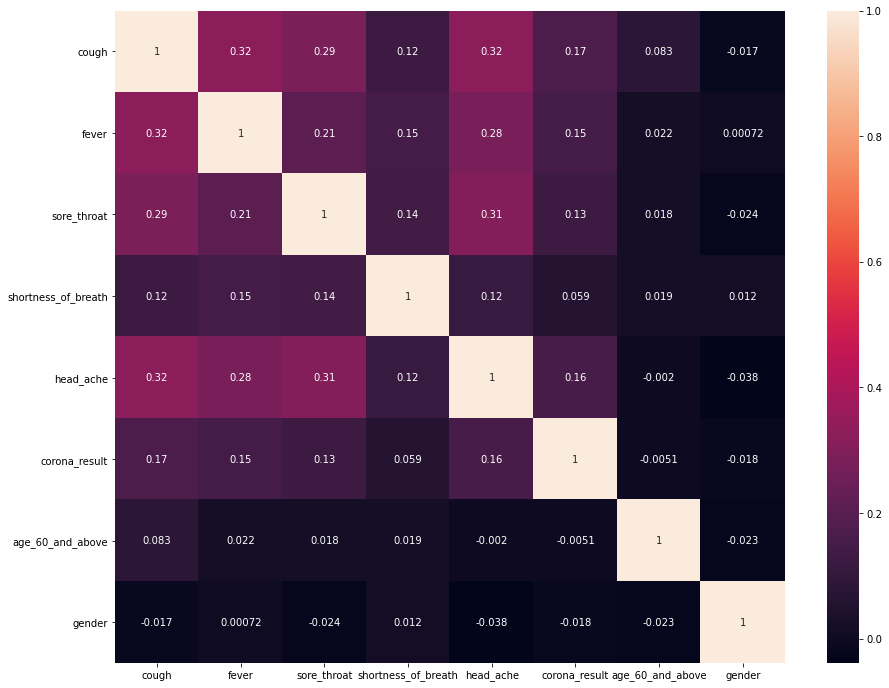

In [237]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(sample_df[['cough', 'fever', 'sore_throat', 'shortness_of_breath' ,'head_ache','corona_result','age_60_and_above', 'gender']].corr(),annot=True)

### Conclusion
Using the hot map we noticed that there is no correlation between the following parameters:
- Gender
- Over the age of 60
- Indication for testing
- test date

So we decided to delete them.

In [308]:
sample_df.drop(['test_indication'], axis=1, inplace=True)

## Among the variables that have a correlation we will put them in a pie chart

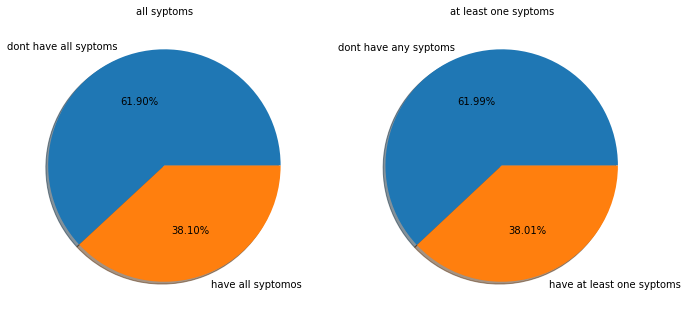

In [239]:
fig, ax = plt.subplots(1,2,figsize = (10,10))
((ax1, ax2)) = ax
labels = ["dont have all syptoms", "have all syptomos"]
values = sample_df[(sample_df['fever']==1) & (sample_df['cough']==1)&(sample_df['head_ache']==1)&(sample_df['sore_throat']==1)]['corona_result'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("all syptoms", fontdict={'fontsize': 10})

labels = ["dont have any syptoms", "have at least one syptoms"]
values = sample_df[(sample_df['fever']==1) | (sample_df['cough']==1) | (sample_df['head_ache']==1) | (sample_df['sore_throat']==1)]['corona_result'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("at least one syptoms", fontdict={'fontsize': 10})
plt.tight_layout()


plt.show()

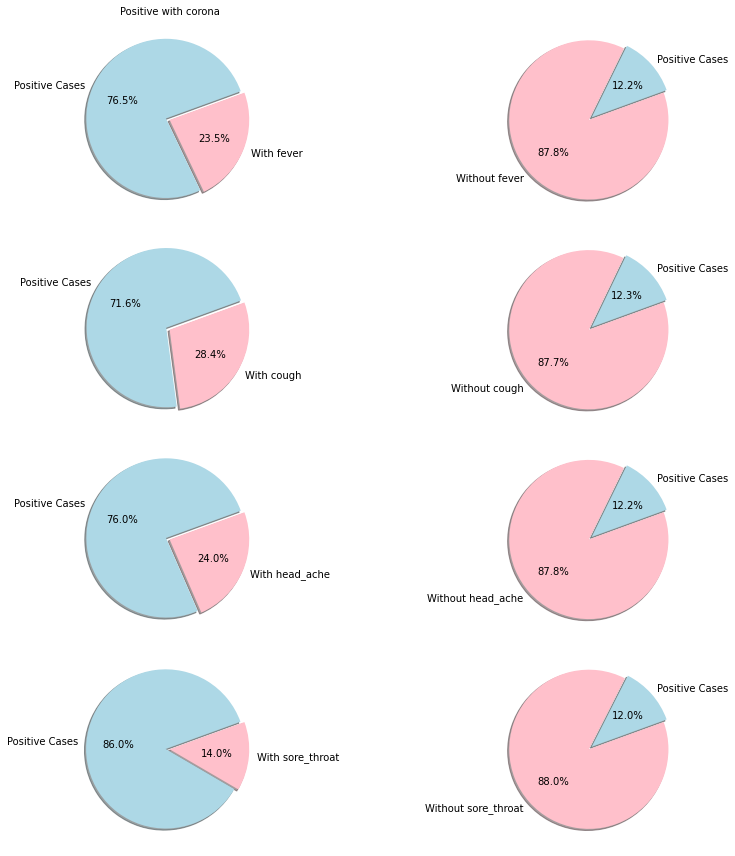

In [240]:
fig, ax = plt.subplots(4,2 ,figsize = (12,12))
((ax1, ax5) , (ax2, ax6),(ax3, ax7) , (ax4, ax8)) = ax

sample_df_fever = sample_df['fever'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With fever'
sizes = [sample_df_positive.sum(), sample_df_fever.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)
ax1.set_title("Positive with corona", fontdict={'fontsize': 10})

sample_df_cough = sample_df['cough'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With cough'
sizes = [sample_df_positive.sum(), sample_df_cough.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax2.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_head_ache = sample_df['head_ache'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With head_ache'
sizes = [sample_df_positive.sum(), sample_df_head_ache.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax3.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_sore_throat = sample_df['sore_throat'] == 1
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'With sore_throat'
sizes = [sample_df_positive.sum(), sample_df_sore_throat.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax4.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_fever = sample_df['fever'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without fever'
sizes = [sample_df_positive.sum(), sample_df_fever.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax5.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_cough = sample_df['cough'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without cough'
sizes = [sample_df_positive.sum(), sample_df_cough.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax6.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_head_ache = sample_df['head_ache'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without head_ache'
sizes = [sample_df_positive.sum(), sample_df_head_ache.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax7.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

sample_df_sore_throat = sample_df['sore_throat'] == 0
sample_df_postive = sample_df['corona_result'] == 1
labels = 'Positive Cases', 'Without sore_throat'
sizes = [sample_df_positive.sum(), sample_df_sore_throat.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 
ax8.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=20)

plt.tight_layout()
plt.show()


In [241]:
sample_df['at1_symptoms'] = np.where((sample_df['fever']==1) | (sample_df['cough']==1)|(sample_df['head_ache']==1)|(sample_df['sore_throat']==1), 1, 0)

In [242]:
sample_df['all_symptoms'] = np.where((sample_df['fever']==1) & (sample_df['cough']==1)&(sample_df['head_ache']==1)&(sample_df['sore_throat']==1), 1, 0)

In [243]:
sample_df['all_symptoms'] = np.where((sample_df['fever']==1) & (sample_df['cough']==1)&(sample_df['head_ache']==1)&(sample_df['sore_throat']==1), 1, 0)

## We take the parameters that are the most correlated

<AxesSubplot:>

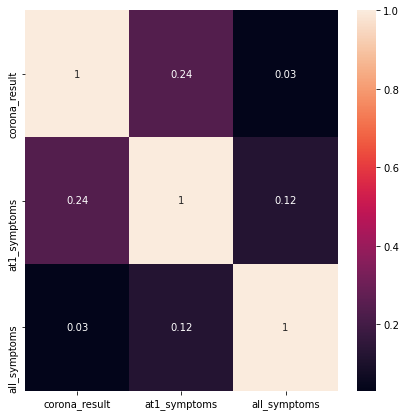

In [244]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(sample_df[['corona_result','at1_symptoms','all_symptoms']].corr(),annot=True)

#  Splitting our train set into x test y test

In [315]:
X = sample_df.drop(columns=['corona_result'])
Y = sample_df['corona_result']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state = 7)

In [316]:
print(X_test.shape)
print(X_train.shape)

(1863, 7)
(10551, 7)


### We figured out that the data is imbalanced so we decied to add Synthetic data to help the model

In [317]:
from sklearn.utils import resample
df_1 = sample_df[sample_df.corona_result==1]
df_2 = sample_df[sample_df.corona_result==0] 
df_1_upsampled = resample(df_1, replace=True,n_samples=10718,random_state=1) 
df_upsampled = pd.concat([df_1_upsampled, df_2])
df_upsampled.corona_result.value_counts()

1    10718
0    10710
Name: corona_result, dtype: int64

In [318]:
X = df_upsampled.drop(columns=['corona_result'])
Y =df_upsampled['corona_result']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state = 1111)

In [319]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, Y)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(X)
dummy_clf.score(X, Y)

0.5001866716445772

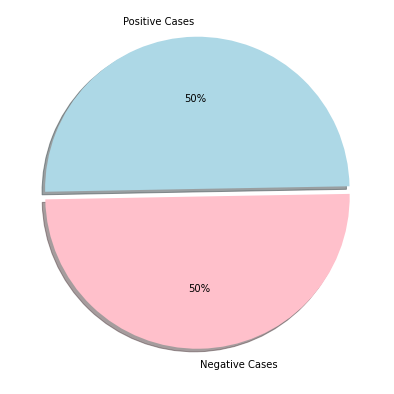

In [320]:
sample_df_negative = df_upsampled['corona_result'] == 0
sample_df_positive = df_upsampled['corona_result'] == 1

labels = 'Positive Cases', 'Negative Cases'
sizes = [sample_df_positive.sum(), sample_df_negative.sum()]
colors = ['lightblue', 'pink']
explode = (0.05, 0) 

fig, axs = plt.subplots(figsize=(7, 7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.f%%', shadow=True, startangle=1)


plt.show()

In [321]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_copy = pd.DataFrame(scaler.transform(X_train),  columns = X_train.columns)
X_test_copy = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

# Evaluating each model's accuracy rate:

# Model #1 : KNN - K-Nearest Neighbors

In [331]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train,y_train)
prediction=knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
confusion_matrix=metrics.confusion_matrix(prediction,y_test)

Accuracy: 0.5445636957536164


Text(0, 0.5, 'Testing Accuracy')

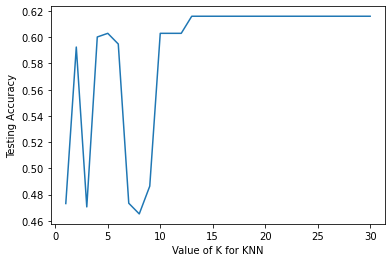

In [253]:
k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    prediction = knn.predict(X_test)
    scores.append(metrics.accuracy_score(prediction, y_test))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Tunining Hyper-parameters 
in order to improve the model accuracy we try to figure the best hyper parameter of the algoritam 

In [255]:
from sklearn.model_selection import cross_val_score
for k in range(1,31,2):
    knn_k = KNeighborsClassifier(n_neighbors = k)
    ValScore = cross_val_score(knn_k, X_train, y_train, cv = 10).mean()
    print(f"Cross-validation score for k = {k} is:", ValScore)

Cross-validation score for k = 1 is: 0.5806254956417388
Cross-validation score for k = 3 is: 0.5111968812579532
Cross-validation score for k = 5 is: 0.5113713336055765
Cross-validation score for k = 7 is: 0.5846988834643418
Cross-validation score for k = 9 is: 0.5899947244418169
Cross-validation score for k = 11 is: 0.6006986220567092
Cross-validation score for k = 13 is: 0.6037818099566511
Cross-validation score for k = 15 is: 0.6036653955212611
Cross-validation score for k = 17 is: 0.5943577261870175
Cross-validation score for k = 19 is: 0.5943577261870175
Cross-validation score for k = 21 is: 0.5943577261870175
Cross-validation score for k = 23 is: 0.5943577261870175
Cross-validation score for k = 25 is: 0.5943577261870175
Cross-validation score for k = 27 is: 0.5943577261870175
Cross-validation score for k = 29 is: 0.5943577261870175


In [256]:
knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)
prediction=model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
confusion_matrix=metrics.confusion_matrix(prediction,y_test)

Accuracy: 0.6029788224342565


In [257]:
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

In [258]:
print("the scores of cross validation:")
print(accuracies.mean()*100)

the scores of cross validation:
51.137133360557655


## Confusion Matrix - KNN

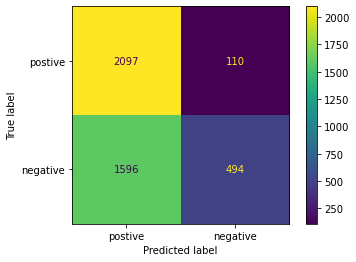

In [259]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction)
cmd = ConfusionMatrixDisplay(cm, display_labels=['postive','negative'])
cmd.plot()

In [260]:
knn_prec = precision_score(prediction,y_test)
print('precision:',knn_prec)
knn_recall = recall_score(prediction,y_test)
print('recall:',knn_recall)
knn_f1 = f1_score(prediction,y_test)
print('f1:',knn_f1)
knn_acc = accuracy_score(prediction,y_test)
print("f2:",metrics.fbeta_score(prediction, y_test, beta=3))
print('accuracy:',knn_acc)

precision: 0.23636363636363636
recall: 0.8178807947019867
f1: 0.36674090571640683
f2: 0.6563911772521924
accuracy: 0.6029788224342565


# Model #2 : LogisticRegression

In [325]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_pred,y_test))
confusion_matrix=metrics.confusion_matrix(y_pred,y_test)

Accuracy: 0.619225384974335


In [262]:
accuracies = cross_val_score(estimator = logreg, X = X_train, y = y_train, cv = 10)

In [263]:
print(accuracies.mean()*100)

60.37818099566511


## Confusion Matrix - LogisticRegression

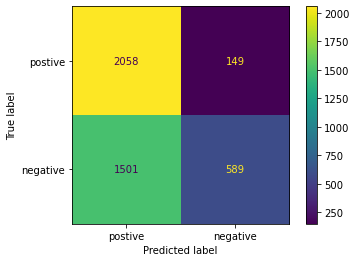

In [264]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['postive','negative'])
cmd.plot()

# Model #3 : DesicionTree


In [265]:
dTree = DecisionTreeClassifier()
dTree.fit(X_train,y_train)
y_pred = dTree.predict(X_test)
dTree_predict = cross_val_predict(dTree, X_train, y_train, cv = 5)

In [266]:
dTree_prec = precision_score(y_train , dTree_predict)
dTree_recall = recall_score(y_train , dTree_predict)
dTree_f1 = f1_score(y_train , dTree_predict)
dTree_acc = accuracy_score(y_train , dTree_predict)
print('precision:',dTree_prec)
print('recall:',dTree_recall)
print('f1:',dTree_f1)
print('accuracy:',dTree_acc)

precision: 0.7980360065466449
recall: 0.28256838201205375
f1: 0.4173585551656252
accuracy: 0.6038987489089322


In [267]:
accuracies = cross_val_score(estimator = dTree, X = X_train, y = y_train, cv = 10)

In [268]:
print(accuracies.mean()*100)

60.38399833132537


# Model #4 : RandomForest

In [328]:
randomForest = RandomForestClassifier()
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)

In [329]:
print("Accuracy:",metrics.accuracy_score(y_pred,y_test))

Accuracy: 0.6196920205319645


In [270]:
randomForest_predict = cross_val_predict(randomForest, X_train, y_train, cv = 5)
randomForest_prec = precision_score(y_train , randomForest_predict)
randomForest_recall = recall_score(y_train , randomForest_predict)
randomForest_f1 = f1_score(y_train , randomForest_predict)
randomForest_acc = accuracy_score(y_train , randomForest_predict)
print('precision:',randomForest_prec)
print('recall:',randomForest_recall)
print('f1:',randomForest_f1)
print('accuracy:',randomForest_acc)

precision: 0.7975801177240026
recall: 0.2826842837273992
f1: 0.4174225569056991
accuracy: 0.6038405586267094


In [271]:
accuracies = cross_val_score(estimator = randomForest, X = X_train, y = y_train, cv = 10)

In [272]:
print(accuracies.mean()*100)

60.38981566698565


### Comparing our model to a dummy model


In [273]:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(X, Y)
DummyClassifier(strategy='stratified')
dummy_clf.predict(X)
dummy_clf.score(X, Y)

0.5040033516432362

In [274]:
print("KNN-Accuracy:",metrics.accuracy_score(prediction,y_test))
print("LogisticRegression-Accuracy:",metrics.accuracy_score(y_pred,y_test))
print('accuracy:',randomForest_acc)
print('Dtree-accuracy:',dTree_acc)

KNN-Accuracy: 0.6029788224342565
LogisticRegression-Accuracy: 0.6157784500814522
accuracy: 0.6038405586267094
Dtree-accuracy: 0.6038987489089322


## For conclusion we can see <BR>**LogisticRegression**<BR>have the best accuracy of 61.6%!

## Semester B : Improve the Project

### Part #1 : Basic information on the DATA 

- Using groupby to explore th Data 

In [159]:
# Show the distribution of gender and age above 60
sample_df.groupby(by='age_60_and_above').gender.value_counts()

age_60_and_above  gender
0.0               0.0       5578
                  1.0       5224
1.0               0.0        897
                  1.0        715
Name: gender, dtype: int64

In [252]:
# Show the distribution of gender and corona_result
sample_df.groupby(by='corona_result').gender.value_counts()

corona_result  gender
0              0.0       5439
               1.0       5283
1              0.0        911
               1.0        781
Name: gender, dtype: int64

In [210]:
# Show the case that patient have all the symptoms
sample_df.cough.value_counts() & sample_df.fever.value_counts() & sample_df.sore_throat.value_counts()& sample_df.shortness_of_breath.value_counts() & sample_df.head_ache.value_counts() 

0    8192
1       0
dtype: int64

In [213]:
# Show the distribution that patient is postive and also have cough
sample_df.groupby(by="corona_result").cough.value_counts()  

corona_result  cough
0              0        10362
               1          401
1              0         1408
               1          243
Name: cough, dtype: int64

In [208]:
# Show the distribution that patient is postive and also have fever
sample_df.groupby(by="corona_result").fever.value_counts()  

corona_result  fever
0              0        10463
               1          300
1              0         1444
               1          207
Name: fever, dtype: int64

In [202]:
# Show the distribution that patient is postive and also have sore_throat
sample_df.groupby(by="corona_result").sore_throat.value_counts()  

corona_result  sore_throat
0              0              10592
               1                171
1              0               1533
               1                118
Name: sore_throat, dtype: int64

In [203]:
# Show the distribution that patient is postive and also have shortness_of_breath
sample_df.groupby(by="corona_result").shortness_of_breath.value_counts()  

corona_result  shortness_of_breath
0              0                      10734
               1                         29
1              0                       1630
               1                         21
Name: shortness_of_breath, dtype: int64

In [204]:
# Show the distribution that patient is postive and also have head_ache
sample_df.groupby(by="corona_result").head_ache.value_counts()  

corona_result  head_ache
0              0            10450
               1              313
1              0             1452
               1              199
Name: head_ache, dtype: int64

- Using Time Series to explore the Data 

In [305]:
# indexed the date
sample_df = sample_df.set_index(['test_date'])
sample_df = sample_df.sort_index()

In [313]:
# show the DataFrame after the changes
sample_df.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
test_date,,,,,,,,
2020-03-22,0,0,0,0,0,0,0.0,0.0
2020-03-22,0,0,0,0,0,0,1.0,0.0
2020-03-22,0,0,0,0,0,0,1.0,1.0
2020-03-22,1,0,0,0,0,0,0.0,0.0
2020-03-22,0,0,0,0,0,0,0.0,1.0


In [310]:
sample_df.tail()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
test_date,,,,,,,,
2022-02-17,0,0,0,0,0,0,1.0,0.0
2022-02-17,0,0,0,0,0,1,0.0,1.0
2022-02-17,0,0,0,0,0,1,0.0,1.0
2022-02-17,0,0,0,0,0,0,0.0,1.0
2022-02-17,0,0,0,0,0,1,0.0,1.0


### Ensemble Classifiers & Boosting Classifires

#### Model#1 :AdaBoost 

In [322]:
# Using AdaBoost Voting model
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier(base_estimator=random_forest)
ada_boost.fit(X_train,y_train)
y_predict_ada_boost = ada_boost.predict(X_test)
ada_accuracy = accuracy_score(y_test,y_predict_ada_boost)

In [323]:
print("The accuracy of AdaBoost model is {:0.4f}%".format(ada_accuracy*100))

The accuracy of AdaBoost model is 61.9459%


#### Model#2 : Hard and Soft Voting 

In [332]:
model_1 = knn
model_2 = random_forest
model_3 = logreg
model_4 = ada_boost

In [336]:
voting_clf = VotingClassifier([('knn', model_1), ('random_forest', model_2), ('logreg', model_3),('ada_boost',model_4)])
voting_clf.fit(X_train,y_train)
y_predict_voting_clf = voting_clf.predict(X_test)
voting_clf_accuracy = accuracy_score(y_test,y_predict_voting_clf)

In [338]:
print("The accuracy of the Voting model is {:0.4f}%".format(voting_clf_accuracy *100))

The accuracy of the Voting model is 61.9225%


In [361]:
# Define the options of the main parameters
voting =['hard','soft']
weights = [(1,1,1,1),(1,1,1,2),(1,1,2,1),(1,2,1,1),(2,1,1,1)]

param_grid = { 'voting'             : voting,
               'weights'            : weights}

In [363]:
# Using GridSearchCV with Kfold CV
voting_model = VotingClassifier([('knn', model_1), ('random_forest', model_2), ('logistic_regression', model_3),('ada_boost',model_4)])
kf = KFold(n_splits=5, random_state=42, shuffle=True)
voting_model_grid = GridSearchCV(estimator = voting_model, param_grid = param_grid, cv = kf, verbose=2, n_jobs = 4)
voting_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=VotingClassifier(estimators=[('knn',
                                                     KNeighborsClassifier(n_jobs=-1)),
                                                    ('random_forest',
                                                     RandomForestClassifier()),
                                                    ('logistic_regression',
                                                     LogisticRegression()),
                                                    ('ada_boost',
                                                     AdaBoostClassifier(base_estimator=RandomForestClassifier()))]),
             n_jobs=4,
             param_grid={'voting': ['hard', 'soft'],
                         'weights': [(1, 1, 1, 1), (1, 1, 1, 2), (1, 1, 2, 1),
                                     (1, 2, 1, 1), (2, 1, 1, 1)]},
             verbose=2)

In [364]:
print("The accuracy of Voting with grid search and Kfold is {:0.4f}%".format(voting_model_grid.best_score_*100))

The accuracy of Voting with grid search and Kfold is 59.8005%


#### Model#3 : Bagging and Pasting

In [345]:
bagging = BaggingClassifier(RandomForestClassifier(),bootstrap=True, n_jobs=-1)
bagging.fit(X_train, y_train)
y_predict_bagging = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test,y_predict_bagging)

In [346]:
print("The accuracy of Bagging Classifier model is {:0.4f}%".format(bagging_accuracy*100))

The accuracy of Bagging Classifier model is 61.9459%


In [347]:
pasting = BaggingClassifier(RandomForestClassifier(), bootstrap=False, n_jobs=-1)
pasting.fit(X_train, y_train)
y_predict_pasting = pasting.predict(X_test)
pasting_accuracy = accuracy_score(y_test,y_predict_pasting)

In [348]:
print("The accuracy of Pasting Classifier model is {:0.4f}%".format(pasting_accuracy*100))

The accuracy of Pasting Classifier model is 61.9692%


#### Model #4 : XGBoostClassifier


In [350]:
xgb =  XGBClassifier()
xgb.fit(X_train, y_train)
y_predict_xgb = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test,y_predict_xgb)

In [360]:
print("The accuracy of XGBoostClassifier model is {:0.4f}%".format(xgb_accuracy*100))

The accuracy of XGBoostClassifier model is 65.0677%


#### Model #5 : Gradient Boosting


In [353]:
gradient=GradientBoostingClassifier()
gradient.fit(X_train, y_train)
y_predict_gradient = gradient.predict(X_test)
gradient_accuracy=accuracy_score(y_test,y_predict_gradient)

In [354]:
print("The accuracy of Gradient Boosting model is {:0.4f}%".format(gradient_accuracy*100))

The accuracy of Gradient Boosting model is 61.9225%
